## Import Libraries

In [1]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import shutil
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

2022-10-28 01:17:53.689786: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## Dataset Prep

In [2]:
train_path = 'dataset/train'
test_path = 'dataset/test'
datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25)
train_batches = datagen.flow_from_directory(train_path, target_size = (100, 100), class_mode='binary', batch_size = 32, subset='training')
test_batches = datagen.flow_from_directory(test_path, target_size = (100, 100), class_mode='binary', batch_size = 32, shuffle=False)
valid_batches = datagen.flow_from_directory(train_path, target_size = (100, 100), class_mode='binary', batch_size = 32, subset='validation')

Found 25500 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Found 8500 images belonging to 2 classes.


In [3]:
img_shape = next(train_batches)[0][0].shape

## Model - 1

In [4]:
# 2 convoltuion layers
model = Sequential(name='Baseline')
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = img_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# cb = [callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)]
model.summary()

Model: "Baseline"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              17335296  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131

2022-10-28 01:17:57.441699: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-28 01:17:57.442688: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-28 01:17:57.471210: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 01:17:57.471495: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.759GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2022-10-28 01:17:57.471511: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-28 01:17:57.523559: I tensorflow/stream_executor/platfor

In [5]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit_generator(train_batches,
                              steps_per_epoch=len(train_batches),
                              epochs=15,
                              verbose = 1,
                              validation_data = valid_batches,
                              validation_steps = len(valid_batches))

2022-10-28 01:17:59.585399: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-28 01:17:59.607426: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3492250000 Hz


Epoch 1/15


2022-10-28 01:18:00.060629: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-10-28 01:18:00.460854: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-10-28 01:18:01.522087: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-10-28 01:18:01.543492: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


797/797 [==============================] - 39s 44ms/step - loss: 0.2006 - accuracy: 0.9194 - val_loss: 0.0552 - val_accuracy: 0.9793
Epoch 2/15
797/797 [==============================] - 38s 47ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0159 - val_accuracy: 0.9940
Epoch 3/15
797/797 [==============================] - 39s 48ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.0139 - val_accuracy: 0.9952
Epoch 4/15
797/797 [==============================] - 37s 46ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0186 - val_accuracy: 0.9949
Epoch 5/15
797/797 [==============================] - 38s 48ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0113 - val_accuracy: 0.9962
Epoch 6/15
797/797 [==============================] - 36s 45ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0075 - val_accuracy: 0.9986
Epoch 7/15
797/797 [==============================] - 39s 50ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.0244 - val_accuracy: 0.9926
Epo

In [7]:
def plot(history, variable1, variable2):
    plt.plot(range(len(history[variable1])), history[variable1])
    plt.plot(range(len(history[variable2])), history[variable2])
    plt.legend([variable1, variable2])
    plt.title(variable1)

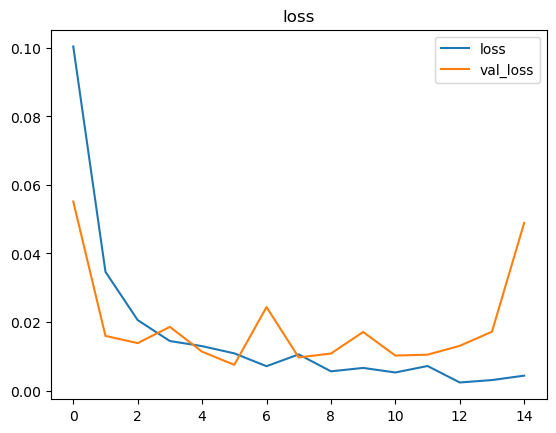

In [37]:
plot(history.history, 'loss', 'val_loss')
plt.savefig('model-loss.png')

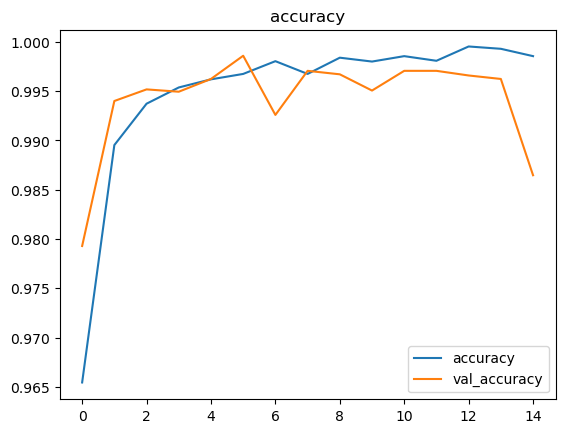

In [38]:
plot(history.history, 'accuracy', 'val_accuracy')
plt.savefig('model-accuracy.png')

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Model - 2

In [10]:
# 4 Conv layers
model2 = Sequential(name='Baseline2')
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape = img_shape))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPool2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# cb = [callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)]
model2.summary()

Model: "Baseline2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          92

In [13]:
model2.compile(optimizer = Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history2 = model2.fit_generator(train_batches,
                              steps_per_epoch=len(train_batches),
                              epochs=15,
                              verbose = 1,
                              validation_data = valid_batches,
                              validation_steps = len(valid_batches))

Epoch 1/15
797/797 [==============================] - 45s 53ms/step - loss: 0.3115 - accuracy: 0.8573 - val_loss: 0.0564 - val_accuracy: 0.9855
Epoch 2/15
797/797 [==============================] - 39s 49ms/step - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0355 - val_accuracy: 0.9864
Epoch 3/15
797/797 [==============================] - 40s 50ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.0321 - val_accuracy: 0.9876
Epoch 4/15
797/797 [==============================] - 39s 49ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.0292 - val_accuracy: 0.9899
Epoch 5/15
797/797 [==============================] - 39s 49ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0235 - val_accuracy: 0.9919
Epoch 6/15
797/797 [==============================] - 39s 49ms/step - loss: 0.0349 - accuracy: 0.9884 - val_loss: 0.0196 - val_accuracy: 0.9940
Epoch 7/15
797/797 [==============================] - 40s 50ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0179 - val_accuracy:

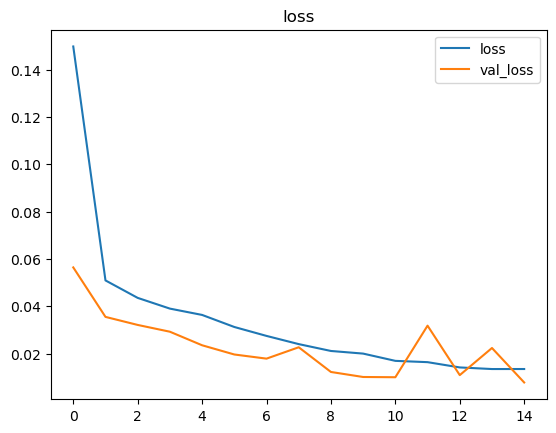

In [39]:
plot(history2.history, 'loss', 'val_loss')
plt.savefig('model2-loss.png')

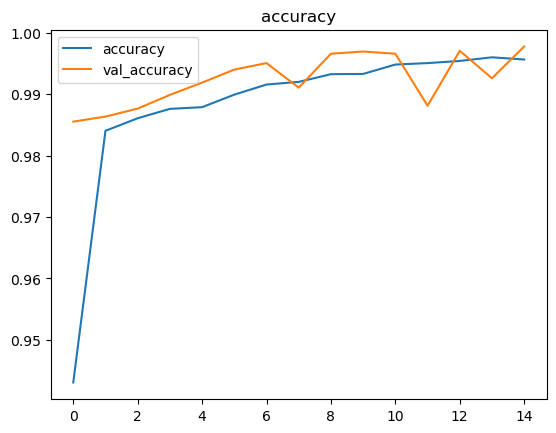

In [40]:
plot(history2.history, 'accuracy', 'val_accuracy')
plt.savefig('model2-accuracy.png')

## VGG - Transfer Learning

In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=img_shape)
base_model.trainable = False ## Not trainable weights

In [18]:
flatten_layer = Flatten()
dense_layer_1 = Dense(4096, activation='relu')
dense_layer_2 = Dense(1024, activation='relu')
prediction_layer = Dense(1, activation='sigmoid')

In [19]:
vgg_model = Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [20]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              18878464  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1025      
Total params: 37,789,505
Trainable params: 23,074,817
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
vgg_model.compile(
    optimizer=Adam(lr = 0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


In [22]:
history3 = vgg_model.fit_generator(train_batches,
                              steps_per_epoch=len(train_batches),
                              epochs=15,
                              verbose = 1,
                              validation_data = valid_batches,
                              validation_steps = len(valid_batches))

Epoch 1/15
797/797 [==============================] - 57s 66ms/step - loss: 0.0437 - accuracy: 0.9827 - val_loss: 0.0090 - val_accuracy: 0.9968
Epoch 2/15
797/797 [==============================] - 44s 55ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0102 - val_accuracy: 0.9961
Epoch 3/15
797/797 [==============================] - 44s 55ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0076 - val_accuracy: 0.9976
Epoch 4/15
797/797 [==============================] - 44s 55ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0079 - val_accuracy: 0.9974
Epoch 5/15
797/797 [==============================] - 44s 56ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0123 - val_accuracy: 0.9967
Epoch 6/15
797/797 [==============================] - 44s 56ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0116 - val_accuracy: 0.9968
Epoch 7/15
797/797 [==============================] - 44s 56ms/step - loss: 0.0042 - accuracy: 0.9982 - val_loss: 0.0129 - val_accuracy:

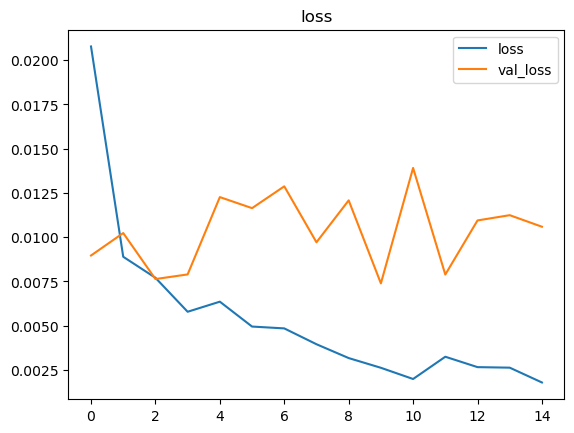

In [41]:
plot(history3.history, 'loss', 'val_loss')
plt.savefig('model3-loss.png')

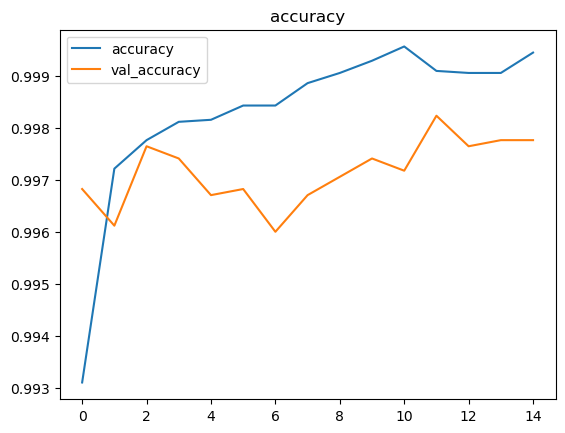

In [42]:
plot(history3.history, 'accuracy', 'val_accuracy')
plt.savefig('model3-accuracy.png')

## VGG - Transfer Learning (Data Augment)

In [25]:
train_path = 'dataset/train'
test_path = 'dataset/test'
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.25)
train_batches = datagen.flow_from_directory(train_path, target_size = (100, 100), class_mode='binary', batch_size = 32, subset='training')
test_batches = datagen.flow_from_directory(test_path, target_size = (100, 100), class_mode='binary', batch_size = 32, shuffle=False)
valid_batches = datagen.flow_from_directory(train_path, target_size = (100, 100), class_mode='binary', batch_size = 32, subset='validation')

Found 25500 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Found 8500 images belonging to 2 classes.


In [26]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=img_shape)
base_model.trainable = False ## Not trainable weights
flatten_layer = Flatten()
dense_layer_1 = Dense(4096, activation='relu')
dense_layer_2 = Dense(1024, activation='relu')
prediction_layer = Dense(1, activation='sigmoid')

In [27]:
vgg_model = Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [28]:
vgg_model.compile(
    optimizer=Adam(lr = 0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


In [29]:
history4 = vgg_model.fit_generator(train_batches,
                              steps_per_epoch=len(train_batches),
                              epochs=30,
                              verbose = 1,
                              callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience = 15, restore_best_weights=True)],
                              validation_data = valid_batches,
                              validation_steps = len(valid_batches))

Epoch 1/30
797/797 [==============================] - 78s 97ms/step - loss: 0.0577 - accuracy: 0.9793 - val_loss: 0.0272 - val_accuracy: 0.9913
Epoch 2/30
797/797 [==============================] - 77s 96ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0165 - val_accuracy: 0.9949
Epoch 3/30
797/797 [==============================] - 77s 97ms/step - loss: 0.0221 - accuracy: 0.9941 - val_loss: 0.0202 - val_accuracy: 0.9939
Epoch 4/30
797/797 [==============================] - 77s 97ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.0146 - val_accuracy: 0.9947
Epoch 5/30
797/797 [==============================] - 77s 97ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0132 - val_accuracy: 0.9966
Epoch 6/30
797/797 [==============================] - 77s 97ms/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.0187 - val_accuracy: 0.9944
Epoch 7/30
797/797 [==============================] - 77s 96ms/step - loss: 0.0185 - accuracy: 0.9953 - val_loss: 0.0123 - val_accuracy:

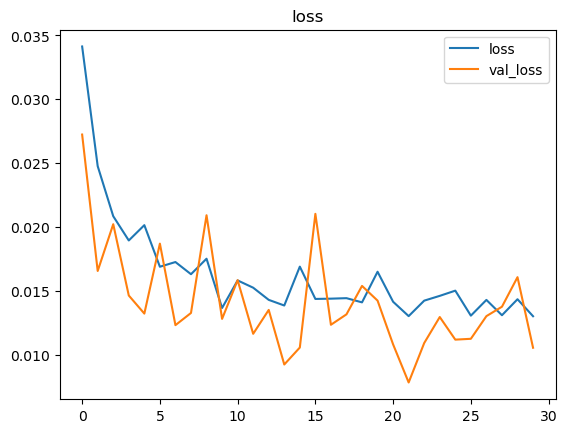

In [43]:
plot(history4.history, 'loss', 'val_loss')
plt.savefig('model4-loss.png')

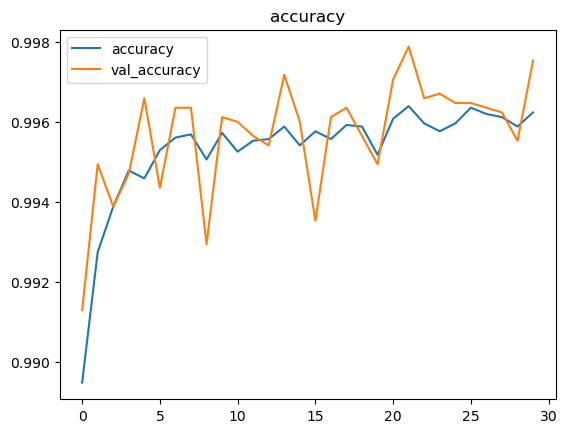

In [44]:
plot(history4.history, 'accuracy', 'val_accuracy')
plt.savefig('model4-accuracy.png')

In [ ]:
vgg_model.save('concrete.h5')

In [45]:
import pandas as pd
pd.DataFrame(history.history).to_csv('model.csv')
pd.DataFrame(history2.history).to_csv('model2.csv')
pd.DataFrame(history3.history).to_csv('model3.csv')
pd.DataFrame(history4.history).to_csv('model4.csv')